In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from astropy.stats import LombScargle

import rayleigh

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

https://en.wikipedia.org/wiki/Integer_sequence

https://en.wikipedia.org/wiki/Fibonacci_number

In [2]:
def fib(n):
    '''
    return n digits of the Fibonacci sequence
    very inefficiently b/c i'm basic
    '''
    out = np.zeros(n)
    out[1] = 1
    for k in range(2,n):
        out[k] = out[k-2] + out[k-1]
    return out
    
    
def fib_approx(n):
    '''
    https://stackoverflow.com/a/4936086
    but w/ numpy arrays b/c i'm basic
    '''
    return np.array(((1 + np.sqrt(5)) / 2) ** np.arange(n) / np.sqrt(5) + 0.5, dtype=np.int)

In [3]:
fib(15)

array([  0.,   1.,   1.,   2.,   3.,   5.,   8.,  13.,  21.,  34.,  55.,
        89., 144., 233., 377.])

In [4]:
fib_approx(15)

array([  0,   1,   1,   2,   3,   5,   8,  13,  21,  34,  55,  89, 144,
       233, 377])

In [5]:
def _gaus(x, a, b, x0, sigma):
    """
    Simple Gaussian function

    Parameters
    ----------
    x : float or 1-d numpy array
        The data to evaluate the Gaussian over
    a : float
        the amplitude
    b : float
        the constant offset
    x0 : float
        the center of the Gaussian
    sigma : float
        the width of the Gaussian

    Returns
    -------
    Array or float of same type as input (x).
    """
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + b

Text(0,0.5,'Flux')

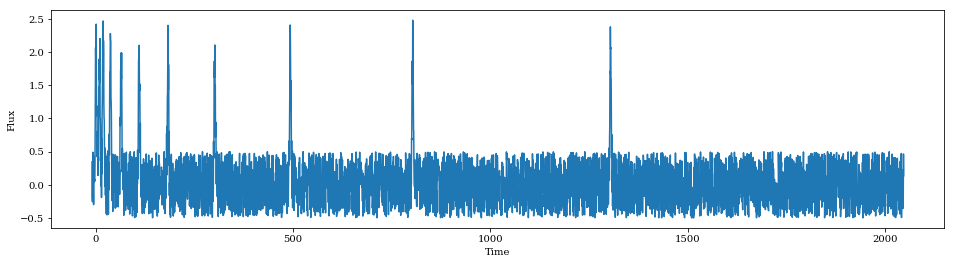

In [6]:
# let's make a Fib-spaced light curve pulse sequence

time = np.arange(-10, 2048, 0.5)
flux = np.random.random(len(time))*1 - 0.5


ptime = 1.8
Nfib = 12
fspace = 9.123
amp = 2.

fib_seq = fib(Nfib) * fspace

for k in range(len(fib_seq)):
    flux = flux + _gaus(time, amp, 0., np.cumsum(fib_seq)[k], ptime)


plt.figure(figsize=(16,4))
plt.plot(time, flux)
plt.xlabel('Time')
plt.ylabel('Flux')

(-10, 150)

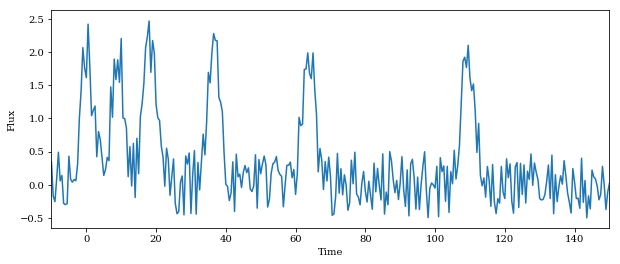

In [7]:
plt.figure(figsize=(10,4))
plt.plot(time, flux)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.xlim(-10,150)
# plt.arrow(4,2,3,0)

In [8]:
GR = 1.61803398875 # the GOLDEN RATIO (of course...)

## Lomb Scargle

Text(0,0.5,'Power')

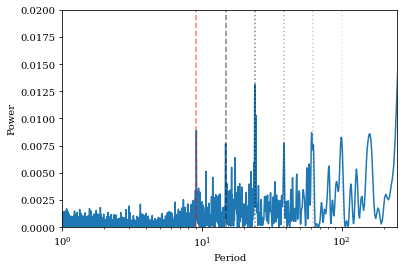

In [9]:
frequency, power = LombScargle(time, flux).autopower()

plt.plot(1. / frequency, power)

plt.xscale('log')
plt.ylim(0,.02)

plt.plot([fspace, fspace],[0,1], c='r', linestyle='--', alpha=0.5)

# plt.plot([fspace*2, fspace*2],[0,1], c='r', linestyle=':', alpha=0.5)
plt.plot([fspace*GR, fspace*GR],[0,1], c='k', linestyle='--', alpha=0.5)

plt.plot([fspace * GR**2, fspace * GR**2],[0,1], c='k', linestyle=':', alpha=0.5)
plt.plot([fspace * GR**3, fspace * GR**3],[0,1], c='k', linestyle=':', alpha=0.3)
plt.plot([fspace * GR**4, fspace * GR**4],[0,1], c='k', linestyle=':', alpha=0.2)
plt.plot([fspace * GR**5, fspace * GR**5],[0,1], c='k', linestyle=':', alpha=0.1)


plt.xlim(1, 250)
plt.xlabel('Period')
plt.ylabel('Power')

## Rayleigh

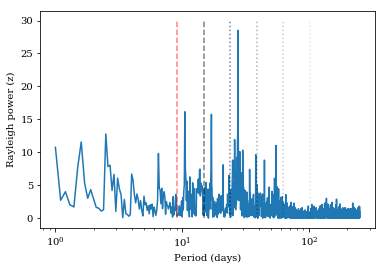

In [13]:
ps = rayleigh.RayleighPowerSpectrum(time[np.where((flux > 1.75))[0]], minper=1, maxper=250, nper=2500)

plt.figure()
plt.plot(np.linspace(1, 250, 2500), ps)
plt.xlabel('Period (days)')
plt.ylabel('Rayleigh power (z)')
plt.xscale('log')

plt.plot([fspace, fspace],[0,30], c='r', linestyle='--', alpha=0.5)
# plt.plot([fspace*2, fspace*2],[0,30], c='r', linestyle=':', alpha=0.5)
# plt.plot([fspace*3, fspace*3],[0,30], c='r', linestyle=':', alpha=0.3)
# plt.plot([fspace*4, fspace*4],[0,30], c='r', linestyle=':', alpha=0.2)

plt.plot([fspace*GR, fspace*GR],[0,30], c='k', linestyle='--', alpha=0.5)
plt.plot([fspace * GR**2, fspace * GR**2],[0,30], c='k', linestyle=':', alpha=0.5)
plt.plot([fspace * GR**3, fspace * GR**3],[0,30], c='k', linestyle=':', alpha=0.3)
plt.plot([fspace * GR**4, fspace * GR**4],[0,30], c='k', linestyle=':', alpha=0.2)
plt.plot([fspace * GR**5, fspace * GR**5],[0,30], c='k', linestyle=':', alpha=0.1)

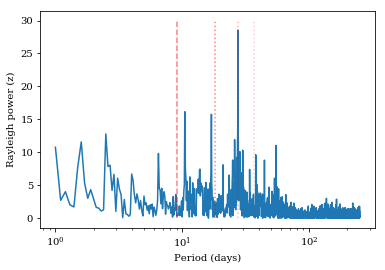

In [12]:
plt.figure()
plt.plot(np.linspace(1, 250, 2500), ps)
plt.xlabel('Period (days)')
plt.ylabel('Rayleigh power (z)')
plt.xscale('log')

plt.plot([fspace, fspace],[0,30], c='r', linestyle='--', alpha=0.5)
plt.plot([fspace*2, fspace*2],[0,30], c='r', linestyle=':', alpha=0.5)
plt.plot([fspace*3, fspace*3],[0,30], c='r', linestyle=':', alpha=0.3)
plt.plot([fspace*4, fspace*4],[0,30], c='r', linestyle=':', alpha=0.2)

# plt.plot([fspace*GR, fspace*GR],[0,30], c='k', linestyle='--', alpha=0.5)
# plt.plot([fspace * GR**2, fspace * GR**2],[0,30], c='k', linestyle=':', alpha=0.5)
# plt.plot([fspace * GR**3, fspace * GR**3],[0,30], c='k', linestyle=':', alpha=0.3)
# plt.plot([fspace * GR**4, fspace * GR**4],[0,30], c='k', linestyle=':', alpha=0.2)
# plt.plot([fspace * GR**5, fspace * GR**5],[0,30], c='k', linestyle=':', alpha=0.1)

## Testing a FIB sequence w/ brute force

In [23]:
true_fib = fib(10)
true_fib

array([ 0.,  1.,  1.,  2.,  3.,  5.,  8., 13., 21., 34.])

In [17]:
# the true Fib sequence + a small amount of noise
test1 = true_fib + np.random.random(10) * 0.01
test1

array([9.67908529e-03, 1.00381902e+00, 1.00888272e+00, 2.00785631e+00,
       3.00419891e+00, 5.00380197e+00, 8.00491445e+00, 1.30057911e+01,
       2.10029338e+01, 3.40067147e+01])

In [21]:
# random numbers
test2 = np.random.random(10) * true_fib.max()
test2.sort()
test2

array([ 3.92055813,  4.53249698,  5.96316124, 13.39972878, 23.46836628,
       24.14820758, 26.92134853, 28.48716629, 30.02467666, 33.1612514 ])

can we tell that `test1` is a Fib sequence, and `test2` is not?

In [85]:
def fib_test1(x, tol=0.1):
    '''
    the most simple, brute-force tester, assume the sequence starts from the beginning!
    
    x = the timestamps of the events
    tol = the fudge-factor to accept
    '''
    # make the real Fib sequence for this size of numbers
    Fseq = fib(x.size)

    # assume the x[0] - x[1] sequence defines the key length
    # keylen = x[1] - x[0]

    # assume first event is exactly the start
    zp = x[0]
    
    # average the two first steps, since that should be the repeat. 
    # Helps reduce uncertainty by sqrt(N)
    keylen = ((x[2] - x[0]) + (x[1] - x[0])) / 2.

    # using the key-length, test against the perfect Fib seq
    test_seq = ((x[1:] - zp) / keylen) / Fseq[1:] - 1 
    isok = np.abs(test_seq) < tol

    print('keylen = ' + str(keylen))

    return isok

In [161]:
(fib_test1(test1))

keylen = 0.996671784779397


array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [160]:
fib_test1(test2)

keylen = 1.327270980923327


array([False, False, False, False, False, False, False,  True, False])

In [144]:
def fib_test2(x, tol=0.1):
    '''
    2nd simple approach:
    given a sequence of spacings, 
    does the previous two predict the one time via The Fib(TM)?
    
    x.size must be > 3
    '''
    
    pred = (x[0:-2] + x[1:-1]) - x[2:]
    
    test = np.abs(pred) < tol
    print(test)
    
    return sum(test) / np.float(x.size-2)

In [145]:
fib_test2(test1)

[ True  True  True  True  True  True  True  True]


1.0

In [148]:
fib_test2(test2)

[False False False False False False False False]


0.0

In [142]:
test3 = np.concatenate([test2, test1, test2])
fib_test2(test3)

[False False False False False False False False False False  True  True
  True  True  True  True  True  True False False False False False False
 False False False False]


0.2857142857142857

In [143]:
# plt.plot(np.arange(10), fib_approx(10), '-o')
# plt.plot((test1[0:-2] + test1[1:-1]) - test1[2:] , '-o')

In [ ]:
def fib_dt(x, tol=0.1, extra = False):
    '''
    simple approach 2b:
    given a sequence of spacings, 
    does the previous three obs predict the next one?
    
    x.size must be > 3
    '''
    
    pred = ((x[2:-1] - x[1:-2]) + (x[1:-2] - x[0:-3])  + x[2:-1]) - x[3:]
    
    test = np.abs(pred) < tol

    if extra:
        print(test)
        
    return float(sum(test)) / np.float(x.size-2)